In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("states.csv")

/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/2217440703.py:1: DtypeWarning: Columns (15,17,18,19,30,32,33,36,40,41,50,52,53,54,56,57,63,65,69,73,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("states.csv")


In [3]:
df

,Unnamed: 0,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,num_reports,replies,body_html,approved_at_utc,banned_at_utc,mod_note,mod_reason_by,mod_reason_title,rte_mode,steward_reports
0,1649,[],NaN,seashoreduck,1.537728e+09,NaN,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1736,[],NaN,Inflamed_toe,1.361158e+09,NaN,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1785,[],NaN,teal_bot,NaN,NaN,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1830,[],NaN,NativeMasshole,NaN,NaN,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1870,[],NaN,Tempest_1,1.414705e+09,NaN,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,3161425,[],NaN,MSUconservative,1.516477e+09,NaN,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35057,3161454,[],NaN,Sailhammers,1.454021e+09,NaN,NaN,[],NaN,Lansing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35058,3161475,[],NaN,MSUconservative,1.516477e+09,NaN,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35059,3161664,[],NaN,Sailhammers,1.454021e+09,NaN,NaN,[],NaN,Lansing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = df[['body','subreddit','score']]

In [5]:
data

,body,subreddit,score
0,All this does is shove the problem onto the bl...,massachusetts,13.0
1,It shouldn’t be starting at all. The productio...,massachusetts,5.0
2,Who's gunna bet that by 2035 we are using clea...,massachusetts,20.0
3,Auto manufacturers were mandated all the way b...,massachusetts,1.0
4,This isn't exactly friendly to the automobile ...,massachusetts,9.0
...,...,...,...
35056,"I mean in terms of engineering, not manufactur...",michigan,4.0
35057,I really appreciate your well thought-out resp...,michigan,1.0
35058,Sorry if my response felt harsh. I just see wa...,michigan,2.0
35059,I completely agree! I have quite a few friends...,michigan,2.0


In [6]:
data['subreddit'].value_counts()
## check cities inside states, try directly searching for city names, try searching for nicknames as well
## colorado vs utah case study

california       4552
texas            2840
newjersey        2839
michigan         2406
connecticut      2098
minnesota        2054
ohio             1676
oklahoma         1160
vermont          1094
hawaii           1084
iowa             1034
georgia           959
newhampshire      894
missouri          786
alabama           766
illinois          647
indiana           612
oregon            609
massachusetts     514
colorado          500
maryland          491
northdakota       468
maine             464
pennsylvania      458
florida           432
idaho             381
delaware          379
arkansas          361
utah              330
rhodeisland       318
kentucky          279
alaska            227
mississippi       219
louisiana         184
tennessee         182
arizona           167
kansas            131
newyork           120
southcarolina     120
newmexico         109
southdakota        63
nevada             54
Name: subreddit, dtype: int64

In [7]:
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['rt','ev','evs','electric','car','vehicle','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [8]:
!pip3 install -U spacy


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
dataa = data.body.values.tolist()
data_words = list(sent_to_words(dataa))
print(data_words[:1])

[['all', 'this', 'does', 'is', 'shove', 'the', 'problem', 'onto', 'the', 'black', 'and', 'brown', 'countries', 'the', 'batteries', 'in', 'electric', 'cars', 'are', 'minerals', 'that', 'are', 'stripped', 'from', 'the', 'earth', 'without', 'care', 'for', 'the', 'environment', 'poisoning', 'people', 'and', 'encouraging', 'ecological', 'disaster', 'https', 'yale', 'edu', 'features', 'china', 'wrestles', 'with', 'the', 'toxic', 'aftermath', 'of', 'rare', 'earth', 'mining', 'https', 'yale', 'edu', 'features', 'china', 'wrestles', 'with', 'the', 'toxic', 'aftermath', 'of', 'rare', 'earth', 'mining', 'amp', 'they', 'can', 'be', 'mined', 'safely', 'but', 'its', 'not', 'really', 'long', 'term', 'solution', 'and', 'the', 'overall', 'impact', 'is', 'not', 'yet', 'understood']]


In [11]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


In [12]:
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.024*"well" + 0.022*"energy" + 0.020*"battery" + 0.019*"power" + '
  '0.012*"thing" + 0.011*"oil" + 0.010*"mean" + 0.010*"solar" + 0.010*"bad" + '
  '0.009*"build"'),
 (1,
  '0.021*"people" + 0.021*"state" + 0.017*"live" + 0.014*"point" + '
  '0.014*"infrastructure" + 0.010*"job" + 0.010*"great" + 0.009*"com" + '
  '0.009*"place" + 0.008*"move"'),
 (2,
  '0.033*"tax" + 0.033*"gas" + 0.028*"charge" + 0.025*"pay" + 0.024*"drive" + '
  '0.020*"year" + 0.018*"road" + 0.018*"mile" + 0.015*"cost" + 0.013*"taxis"'),
 (3,
  '0.018*"people" + 0.017*"buy" + 0.016*"new" + 0.016*"tesla" + 0.015*"look" + '
  '0.014*"really" + 0.013*"way" + 0.012*"year" + 0.011*"price" + 0.011*"less"')]


In [13]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/181664221.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/181664221.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.5551,"well, energy, battery, power, thing, oil, mean...","[shove, problem, black, brown, country, batter..."
1,1,0,0.3919,"well, energy, battery, power, thing, oil, mean...","[start, production, horrible, planet, mention,..."
2,2,0,0.4480,"well, energy, battery, power, thing, oil, mean...","[gunna, bet, clean, energy, power, new, grandp..."
3,3,3,0.5487,"people, buy, new, tesla, look, really, way, ye...","[mandate, way, back, start, sell, team, oil, c..."
4,4,3,0.7508,"people, buy, new, tesla, look, really, way, ye...","[exactly, friendly, automobile, industry, real..."
5,5,0,0.5175,"well, energy, battery, power, thing, oil, mean...","[output, manufacturing, process, specify, cons..."
6,6,0,0.4502,"well, energy, battery, power, thing, oil, mean...","[sure, shift, burden, still, sell, pivot, chea..."
7,7,3,0.6353,"people, buy, new, tesla, look, really, way, ye...","[issue, plan, let, ignore, supermajority, prob..."
8,8,3,0.4690,"people, buy, new, tesla, look, really, way, ye...","[limit, consumer, option, transportation, stat..."
9,9,2,0.5601,"tax, gas, charge, pay, drive, year, road, mile...","[cool, state, ban, people, reason, benefit, se..."


In [14]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9557,"well, energy, battery, power, thing, oil, mean, solar, bad, build","[efficient, clean, power, plant, control, condition, produce, energy, combustible, engine, power..."
1,1,0.9305,"people, state, live, point, infrastructure, job, great, com, place, move","[summary, medium, summarie, ballot, type, activity, pdf, com, medium, ballotscast, pdf]"
2,2,0.9732,"tax, gas, charge, pay, drive, year, road, mile, cost, taxis","[lose, fuel, tax, punitive, math, average, drive, mile, year, mpg, per_gallon, fuel, surcharge, ..."
3,3,0.9515,"people, buy, new, tesla, look, really, way, year, price, less","[sell, available, toyotas, subarus, sale, year, model, next, year, buy, year, ago, bother, shop,..."


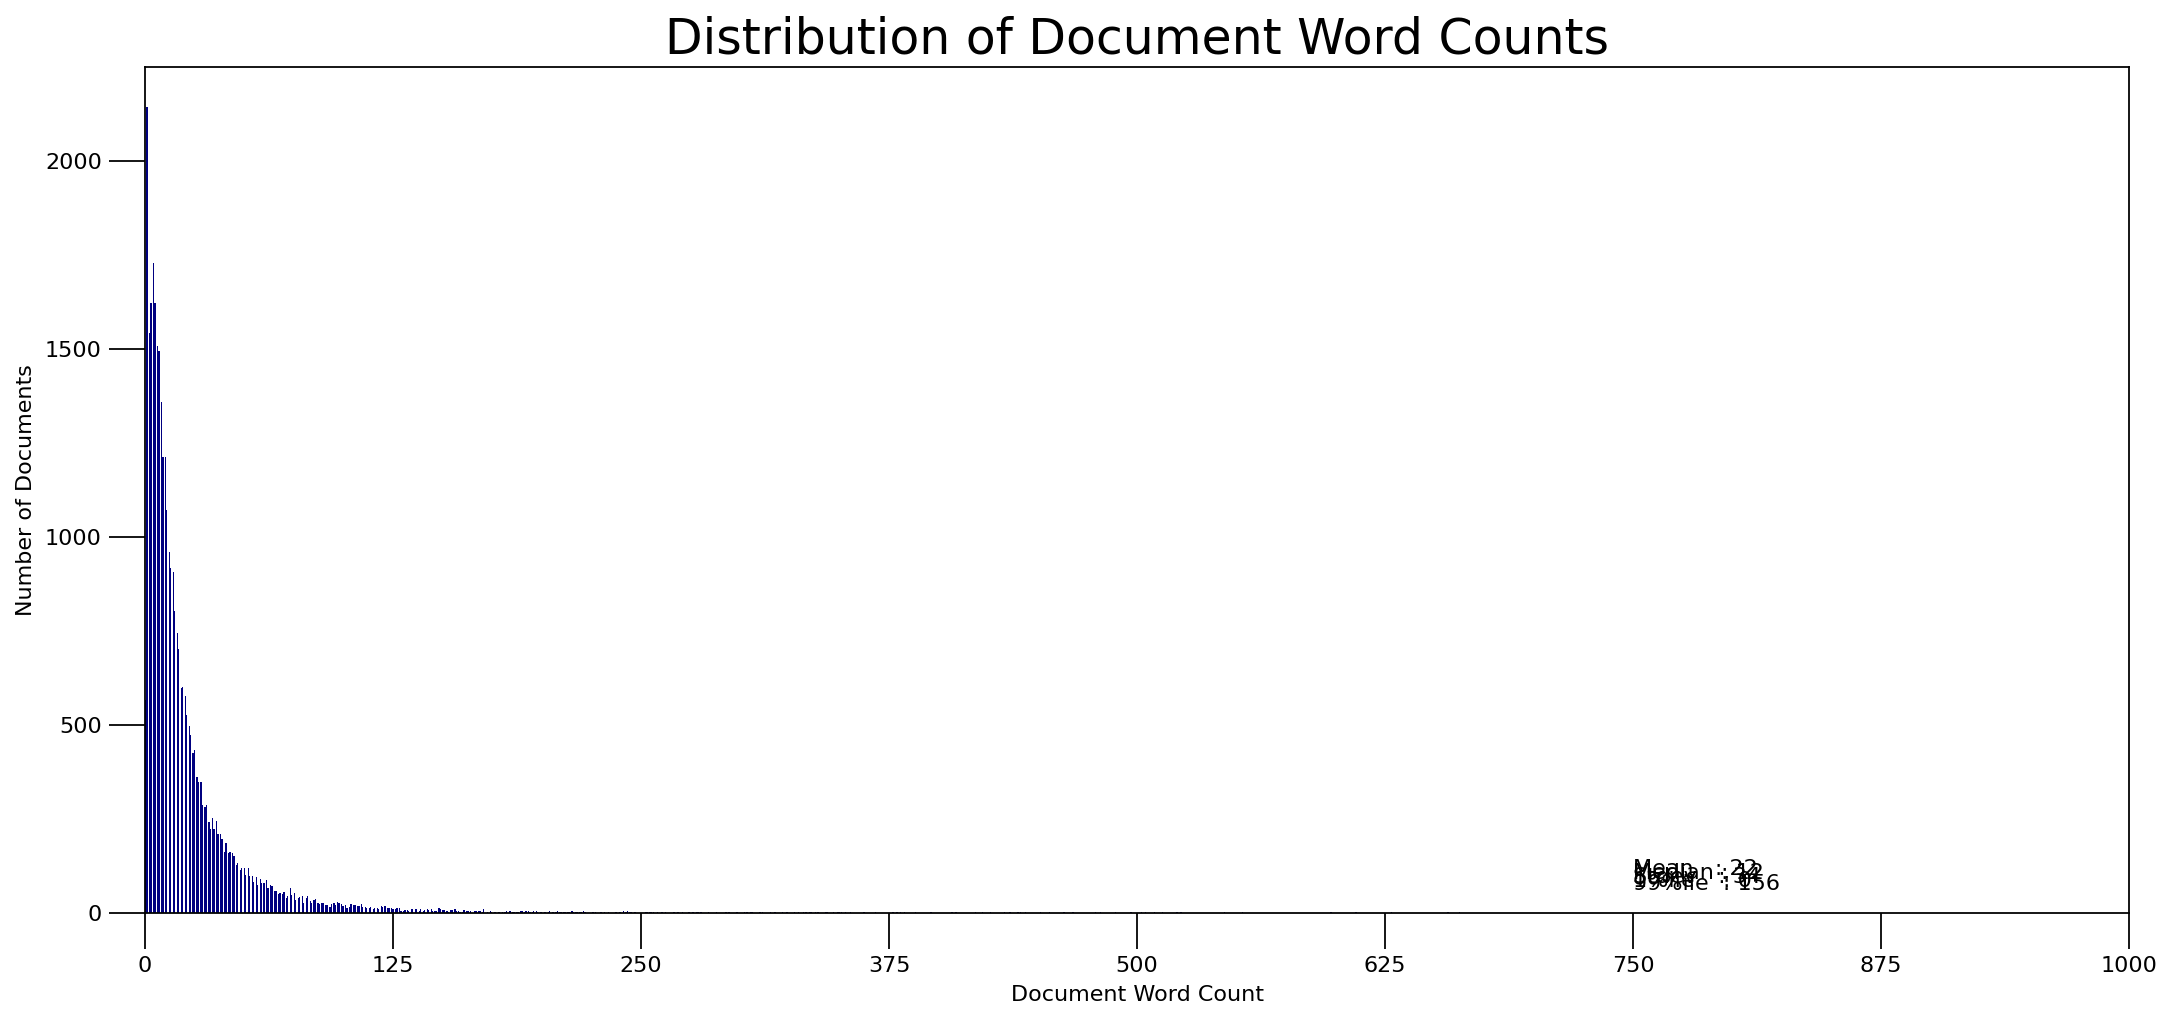

In [15]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/2460086901.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/2460086901.py:

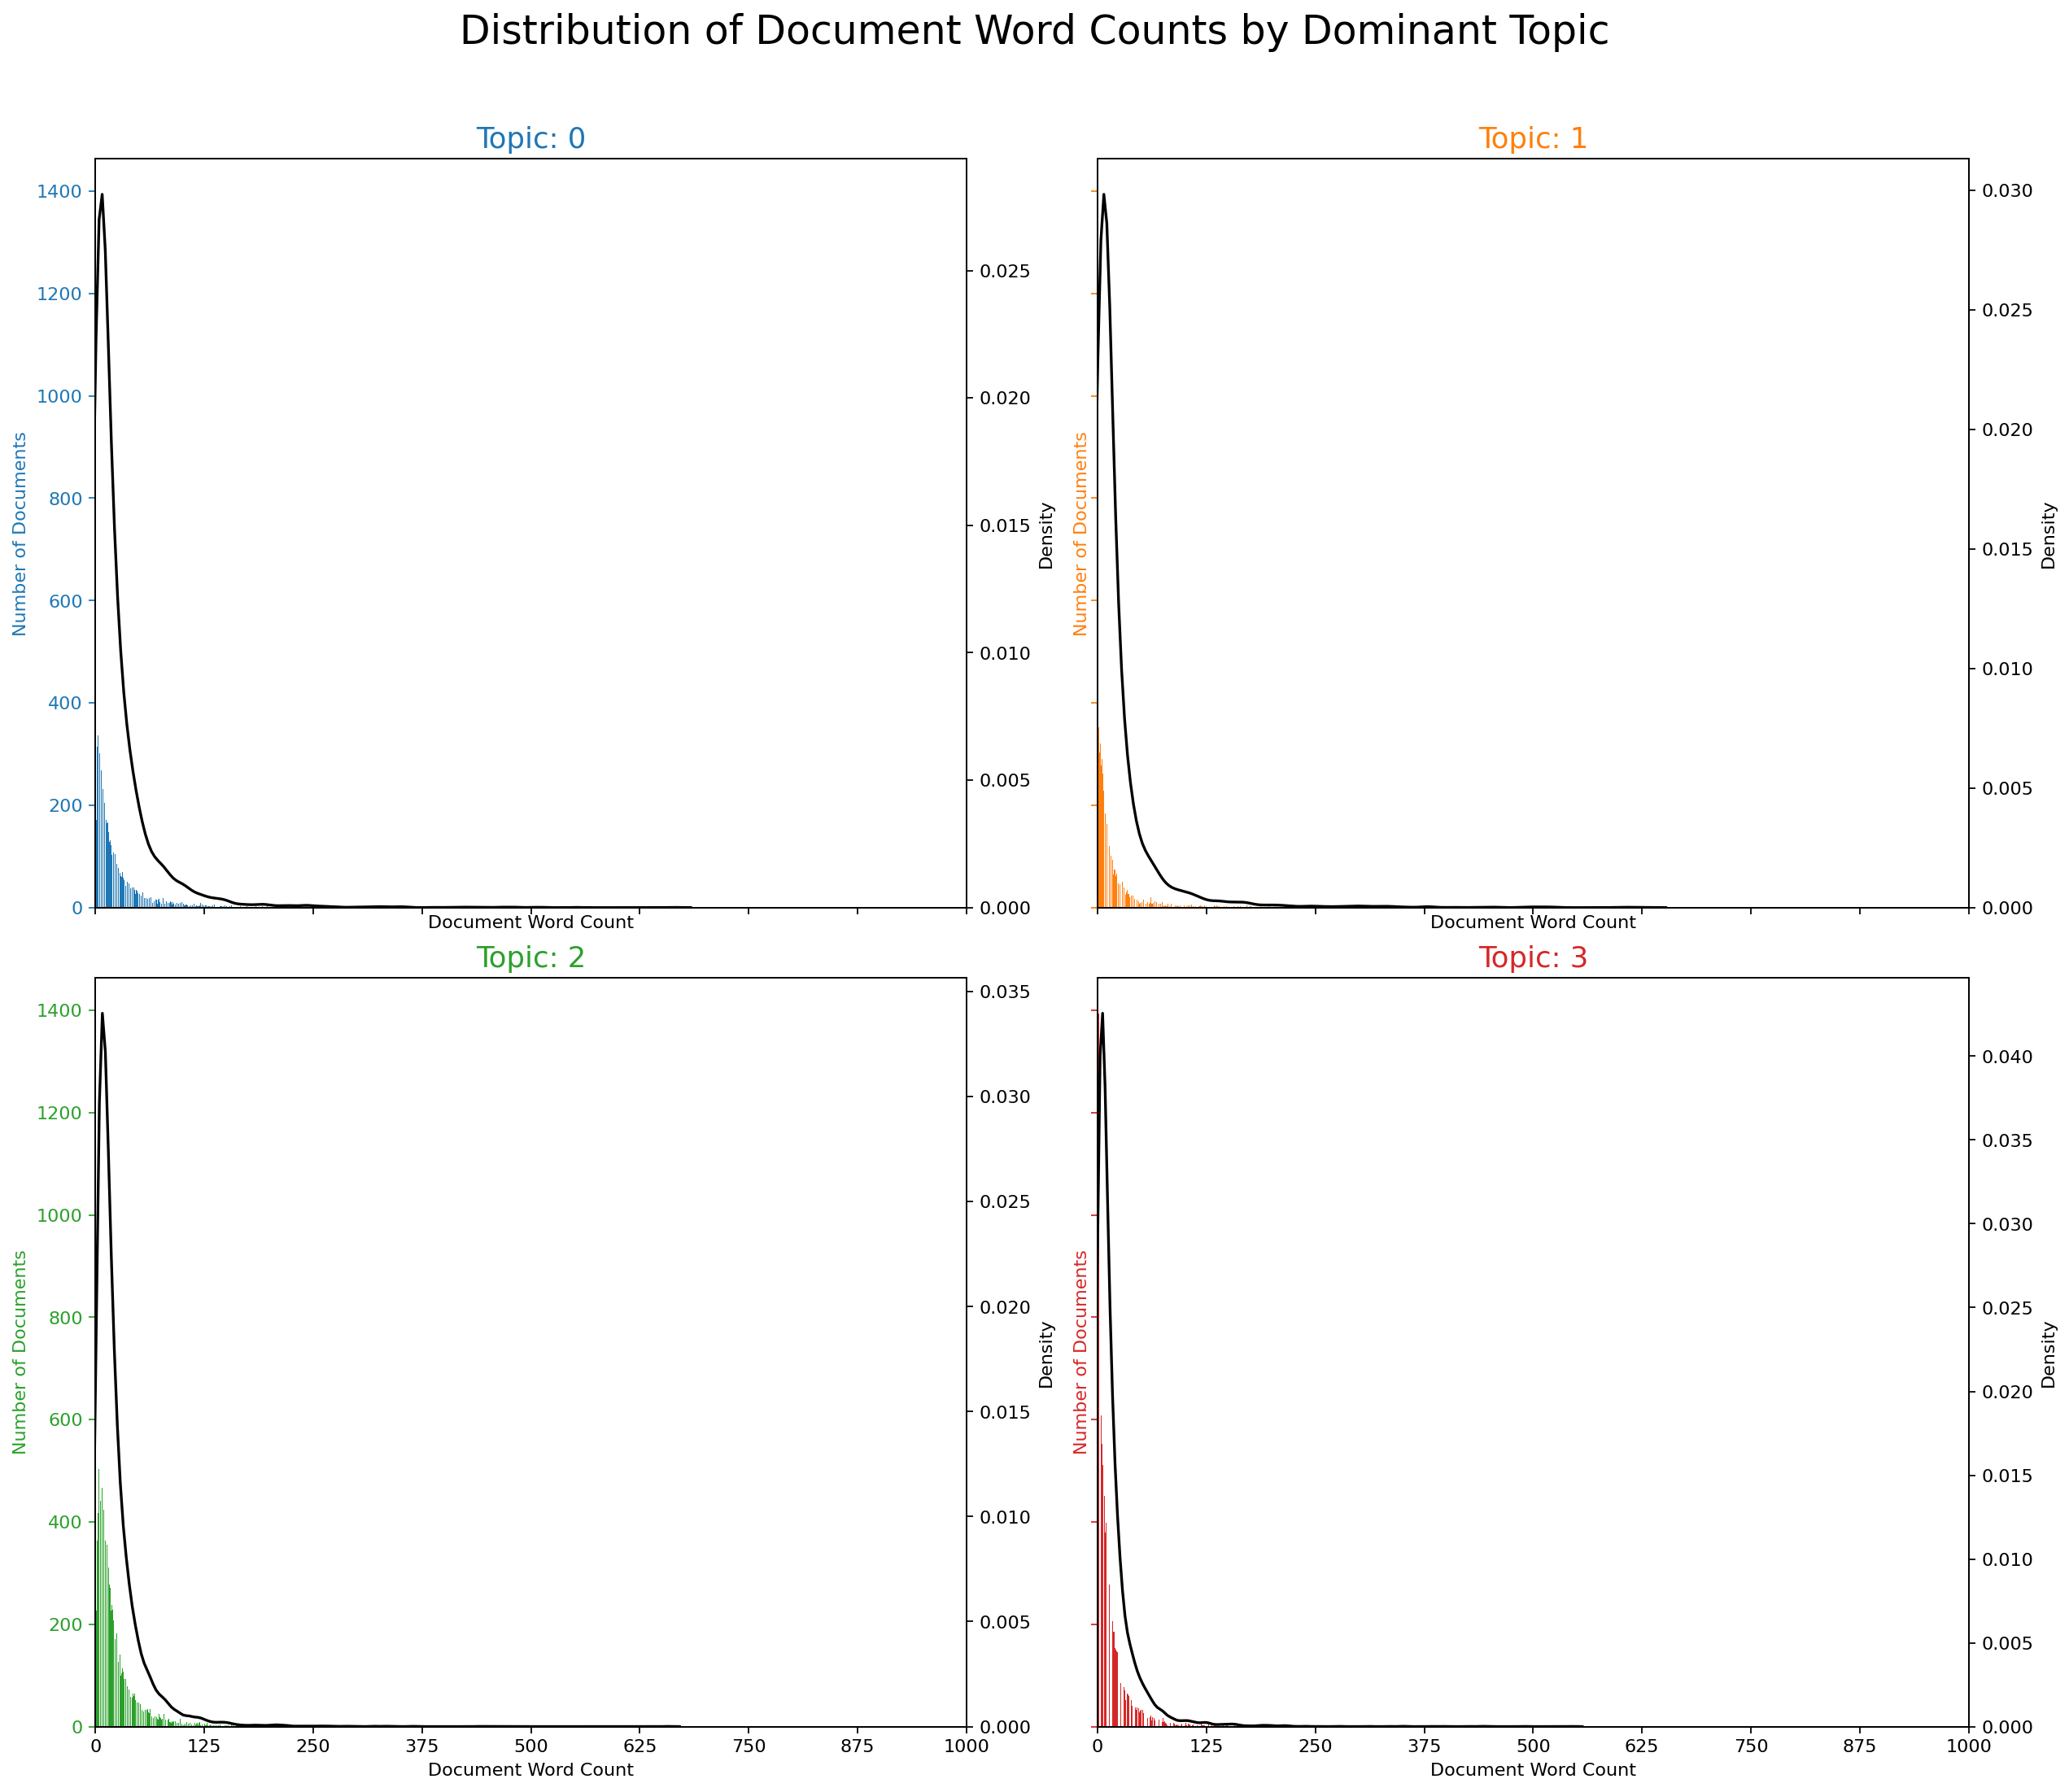

In [16]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

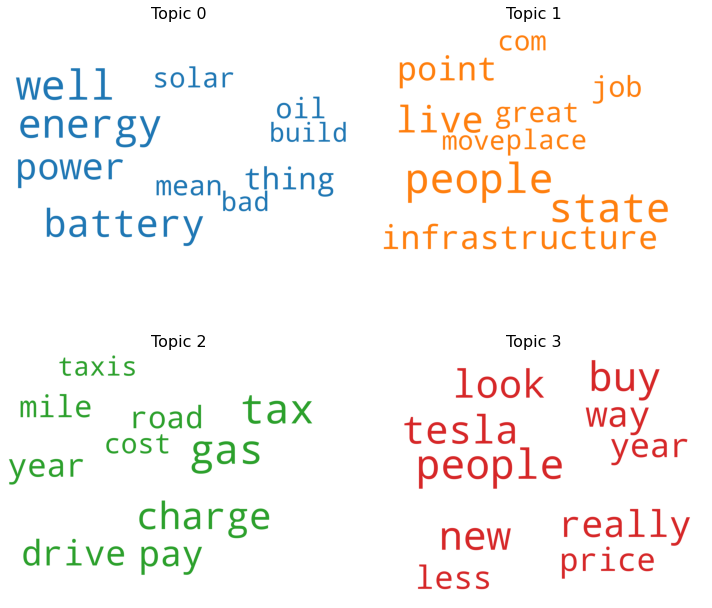

In [17]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/3335660495.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/3335660495.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/3335660495.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_80999/3335660495.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalig

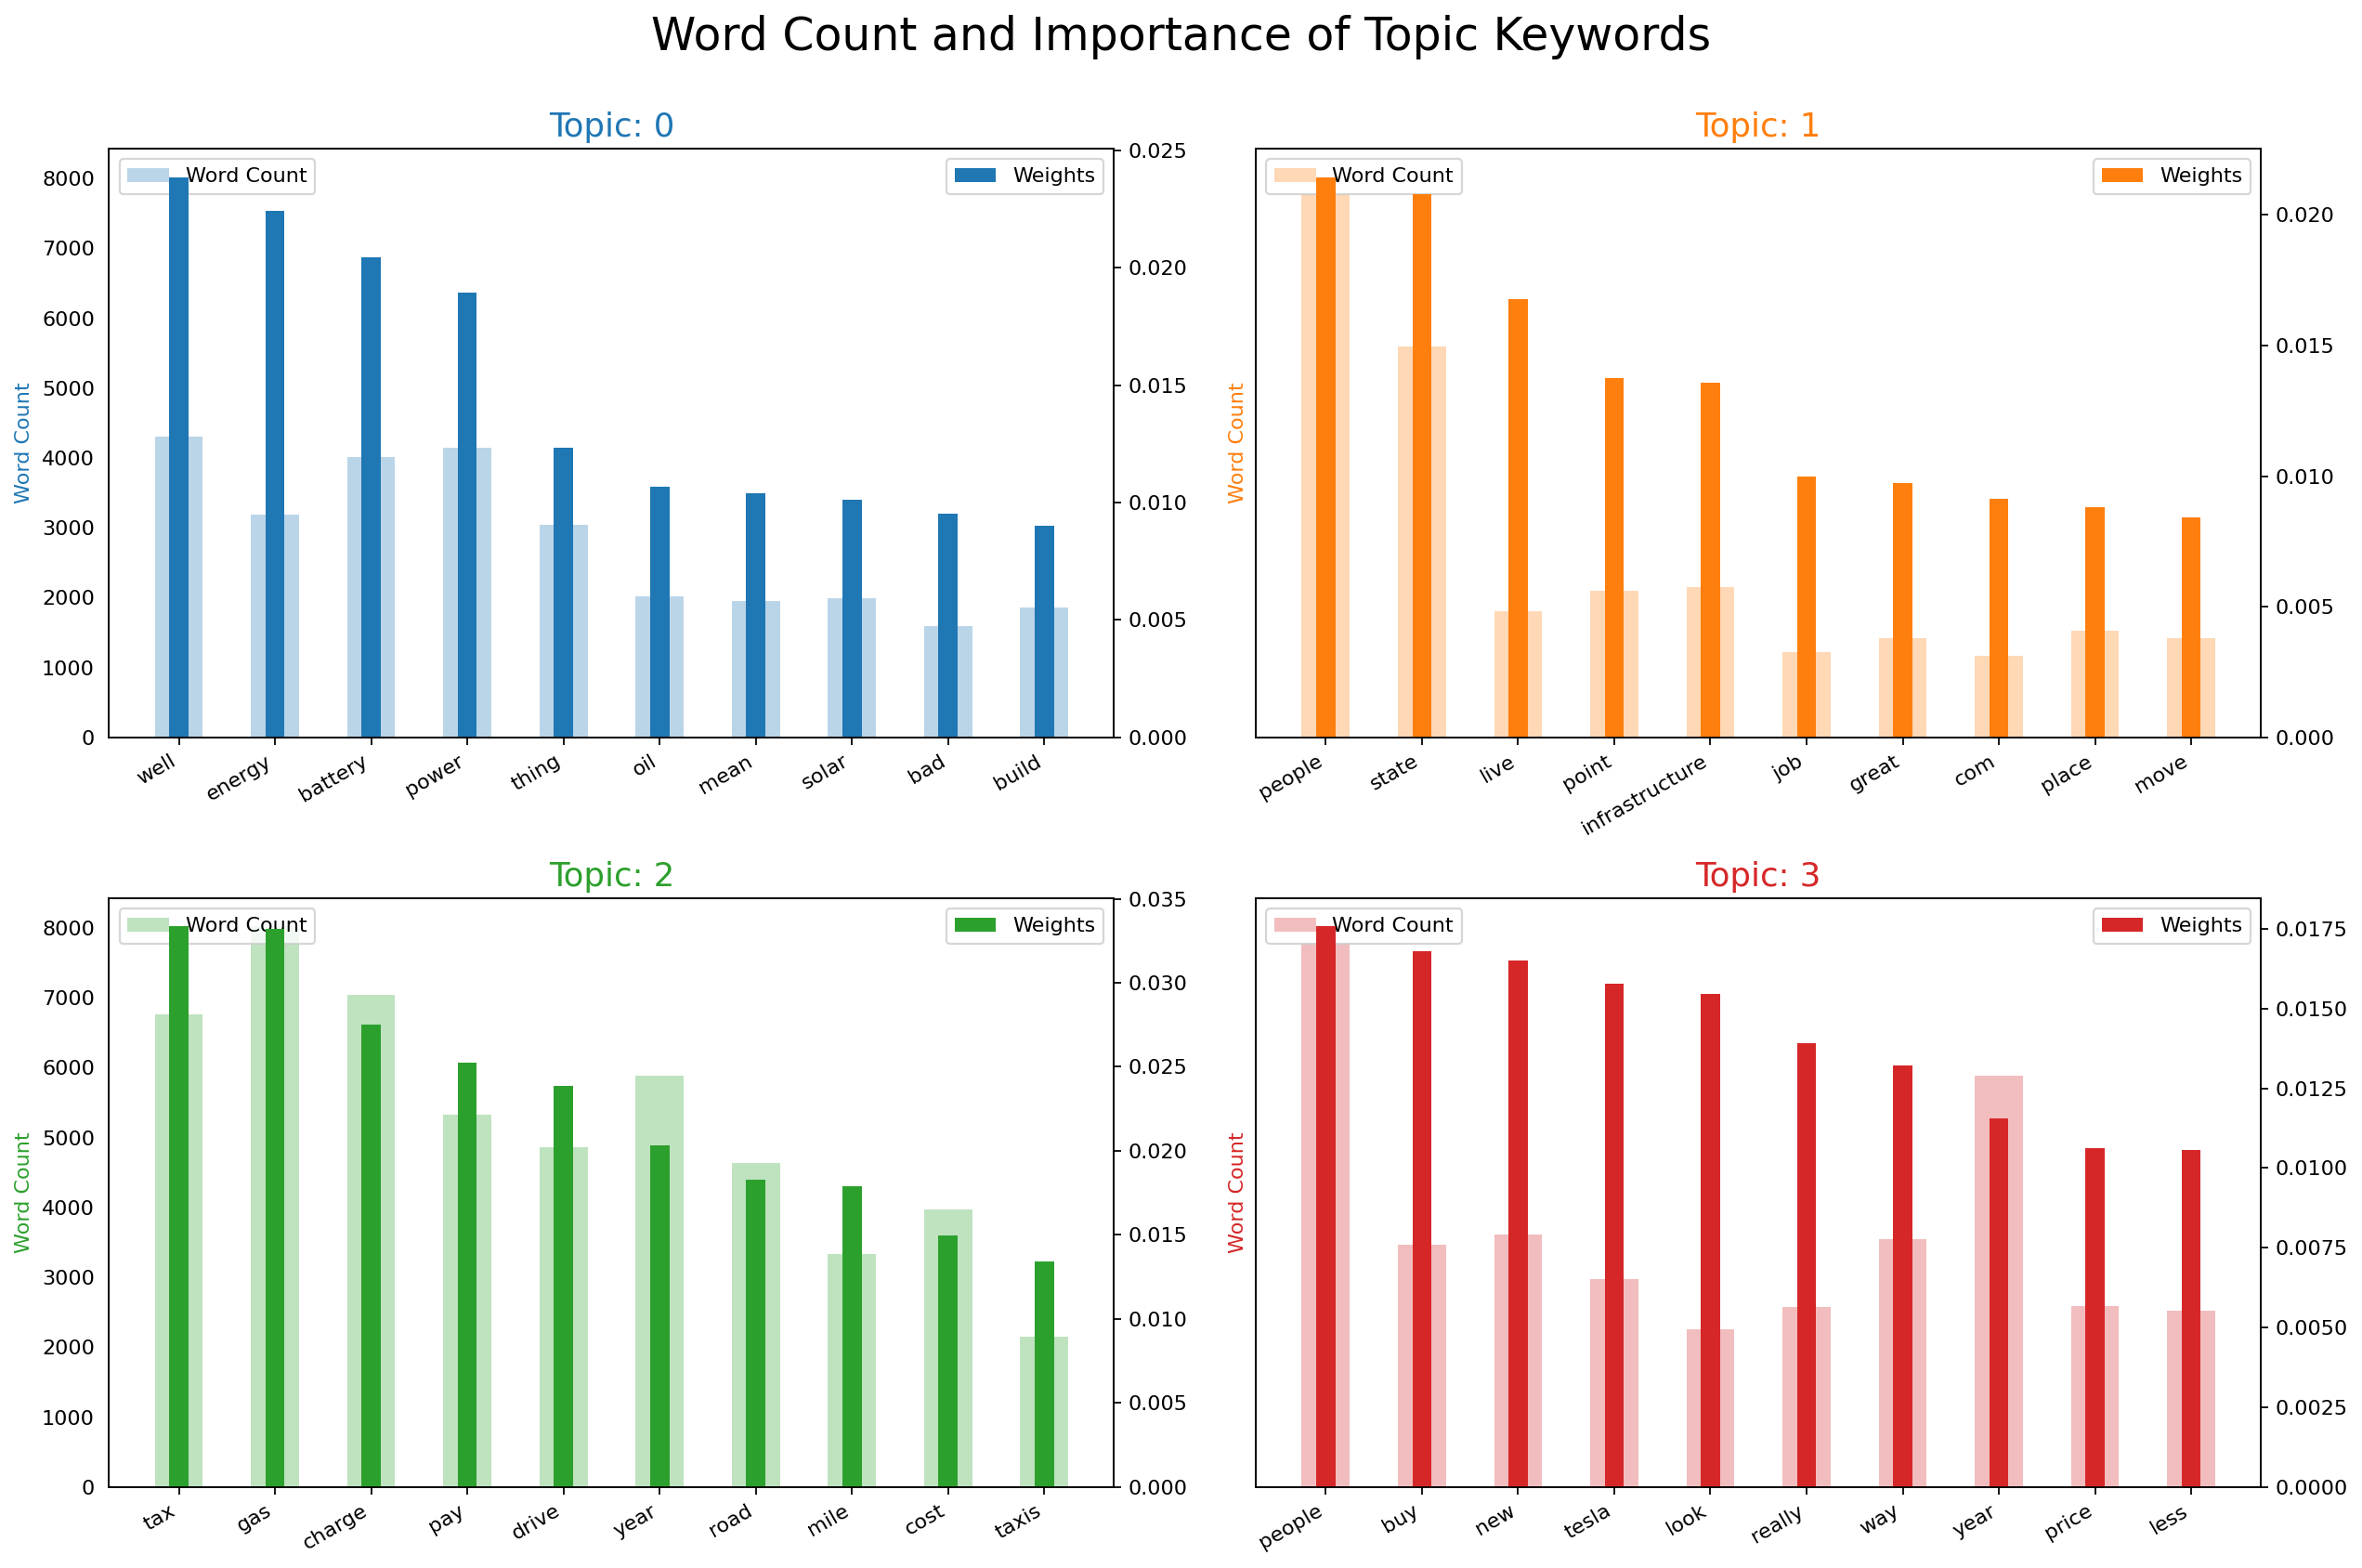

In [26]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [19]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

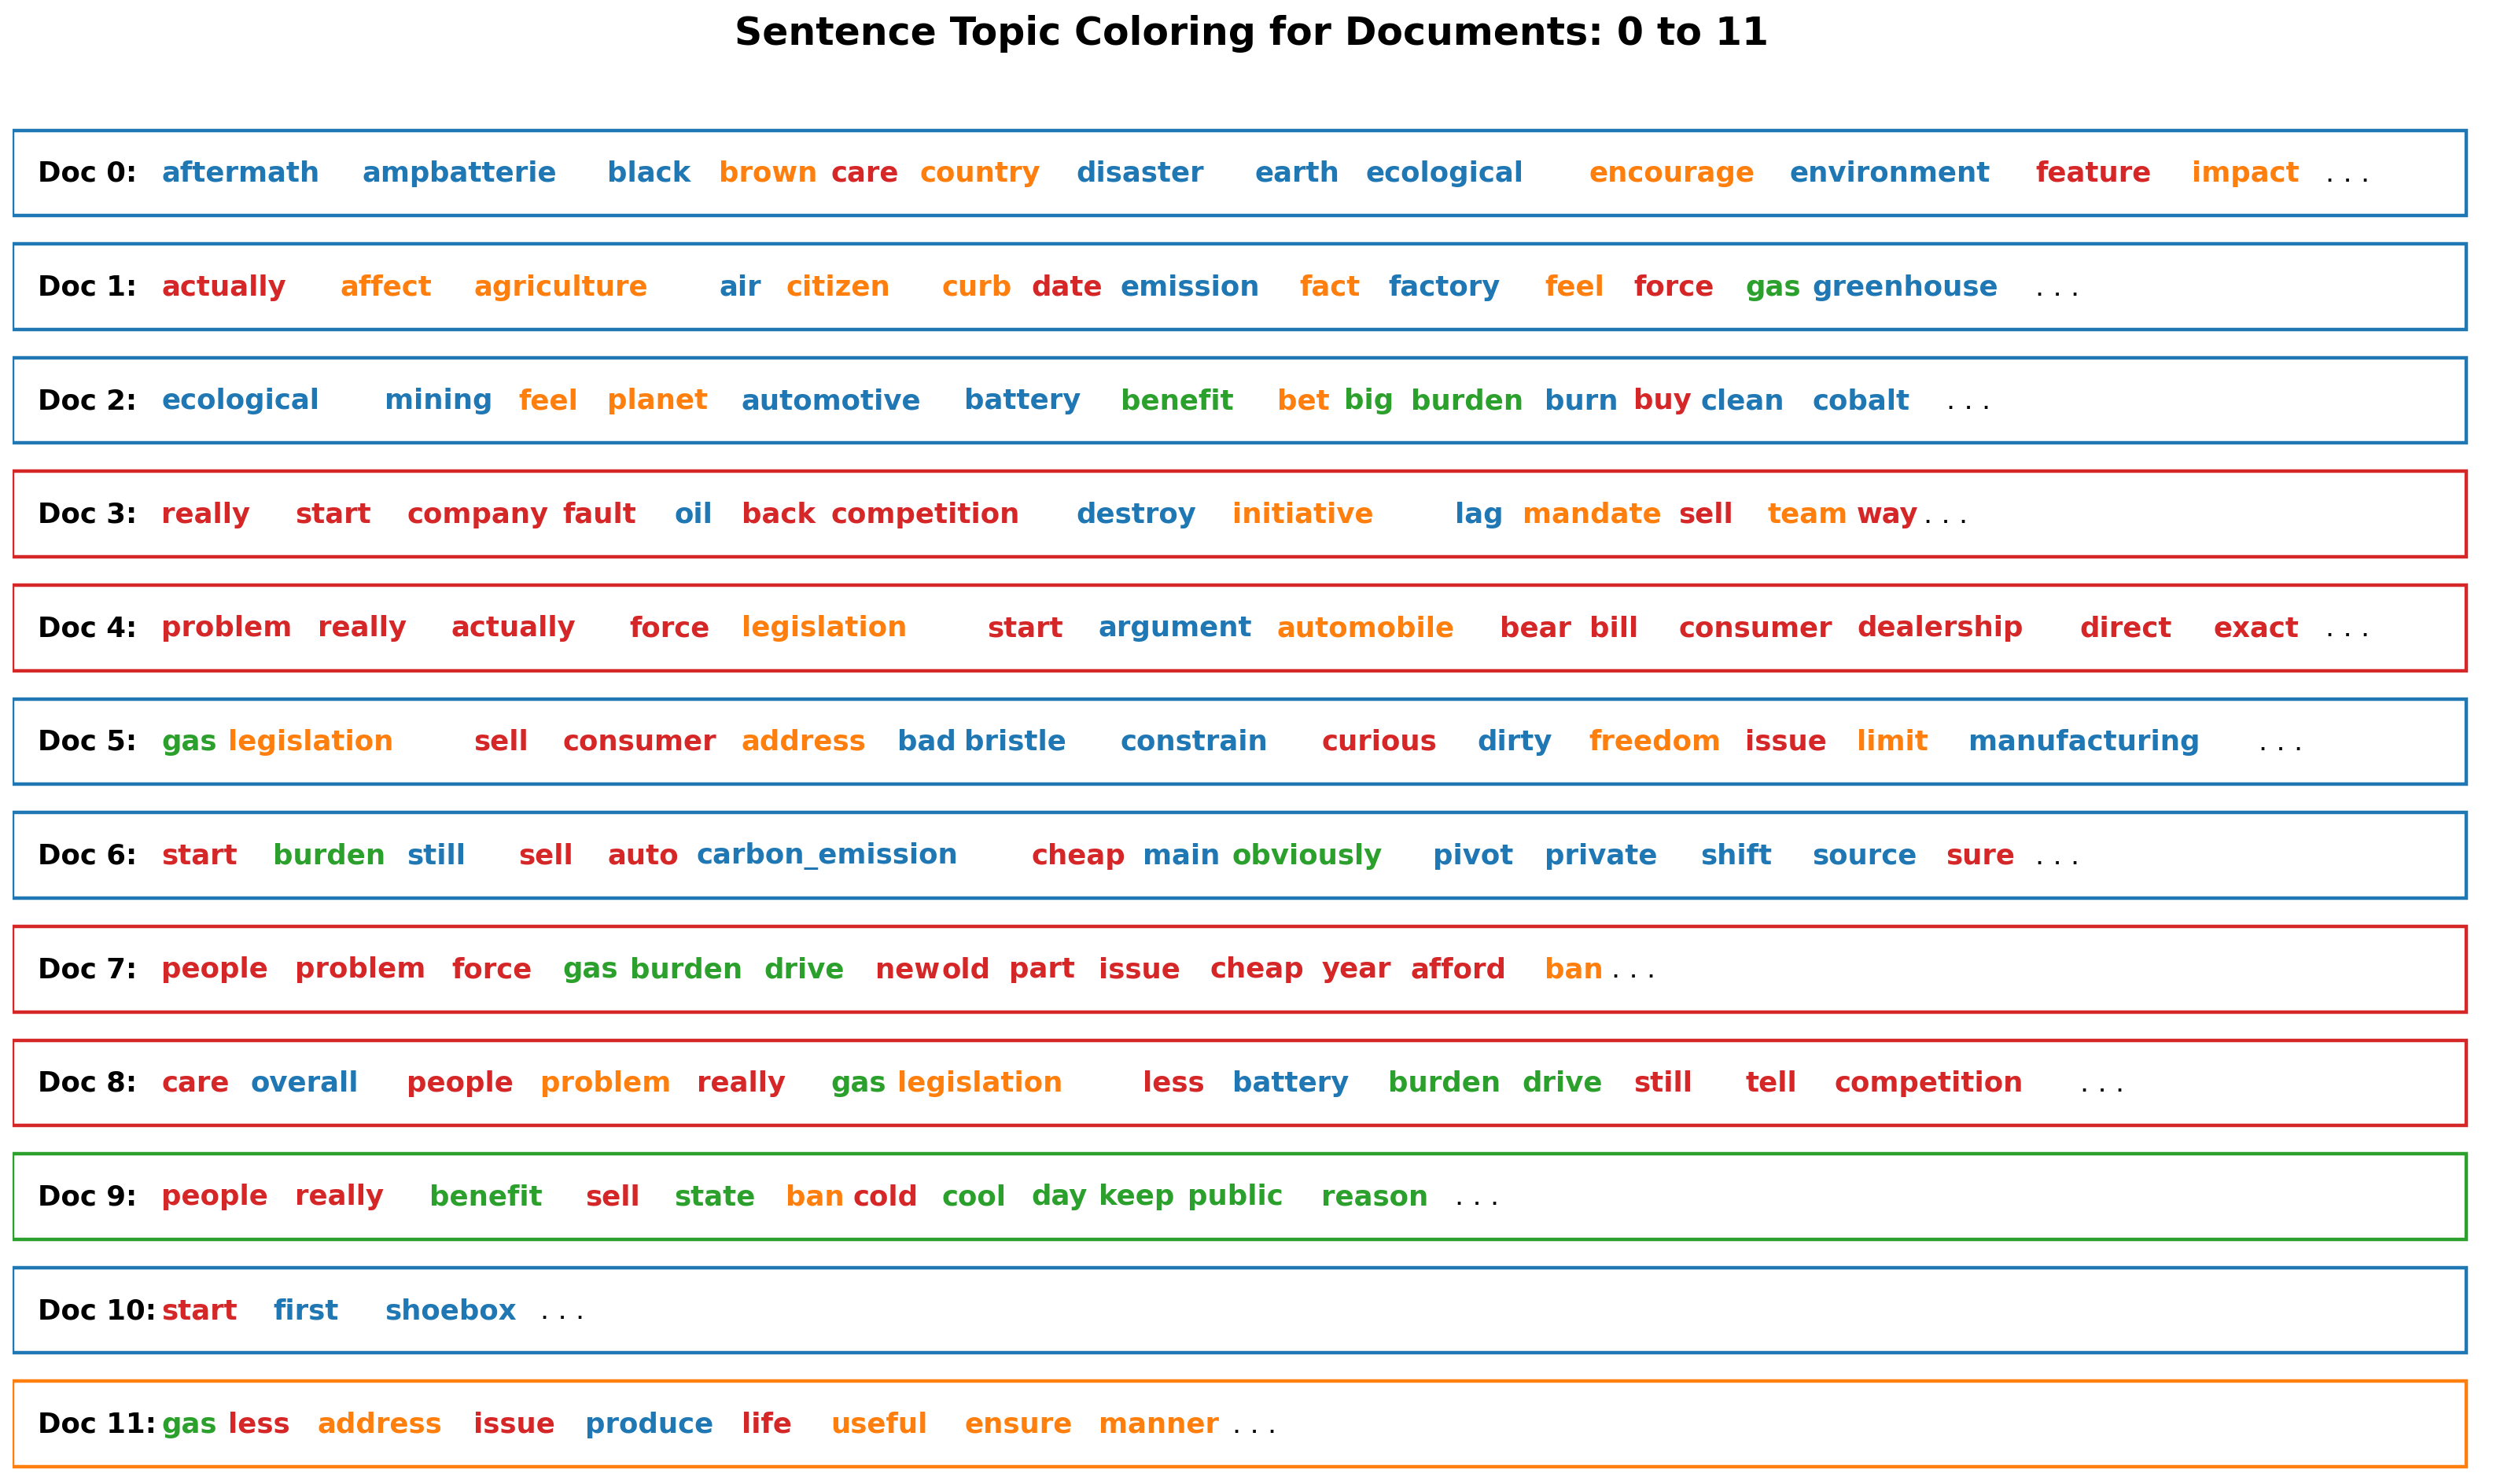

In [20]:
sentences_chart()  

In [21]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

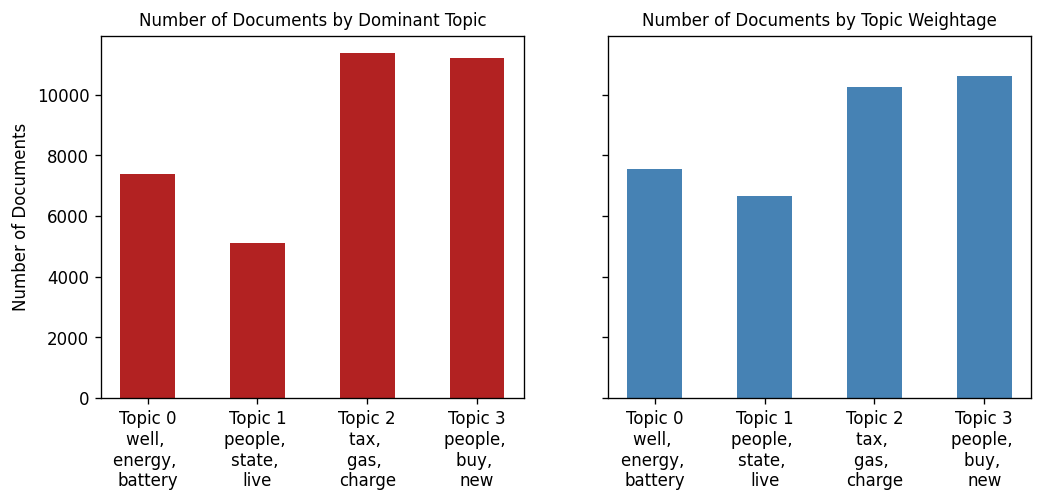

In [22]:
from matplotlib.ticker import FuncFormatter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [23]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 31131 samples in 0.007s...
[t-SNE] Computed neighbors for 31131 samples in 0.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31131
[t-SNE] Computed conditional probabilities for sample 2000 / 31131
[t-SNE] Computed conditional probabilities for sample 3000 / 31131
[t-SNE] Computed conditional probabilities for sample 4000 / 31131
[t-SNE] Computed conditional probabilities for sample 5000 / 31131
[t-SNE] Computed conditional probabilities for sample 6000 / 31131
[t-SNE] Computed conditional probabilities for sample 7000 / 31131
[t-SNE] Computed conditional probabilities for sample 8000 / 31131
[t-SNE] Computed conditional probabilities for sample 9000 / 31131
[t-SNE] Computed conditional probabilities for sample 10000 / 31131
[t-SNE] Computed conditional probabilities for sample 11000 / 31131
[t-SNE] Computed conditional probabilities for sample 12000 / 31131
[t-SNE] Computed conditional probabilities for sam

/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.250122
[t-SNE] KL divergence after 1000 iterations: 1.433334


Loading BokehJS ...

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

In [24]:
!pip3 install bokeh


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [25]:
import pyLDAvis
from pyLDAvis import gensim

pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


ImportError: cannot import name 'gensim' from 'pyLDAvis' (/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/pyLDAvis/__init__.py)

In [ ]:
!pip3 install pyLDAvis.gensim

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()